#### La pregunta a responder usando el dataset es, Cual es el motivo o razón de se generen padecimientos en el corazón?

A continuacion se explican los campos del dataset y su significado (lamento no darle buen formato pero no supe como darle buen formato):

<b>age:</b> Age in years<br>
<b>sex:</b> Sex (1 = Male, 0 = Female)<br>
<b>cp:</b> Chest Pain Type (0-4)<br>
&emsp;     0, Typical angina<br>
&emsp;             Chest pain related decrease blood supply to the heart<br>
&emsp;        1, Atypical angina<br>
&emsp;       Chest pain not related to heart<br>
&emsp;         2, Non-anginal pain<br>
&emsp;             Typically esophageal spasms (non heart related)<br>
&emsp;        3, Asymptomatic<br>
&emsp;             Chest pain not showing signs of disease<br>
<b>trestbps:</b> Resting blood pressure upon admission (mm Hg)<br>
&emsp;       Anything above 130-140 is typically cause for concern<br>
<b>chol:</b> Serum cholestrol level (mg/dL)<br>
&emsp;   serum = LDL + HDL + .2 * triglycerides<br>
&emsp;        Above 200 is cause for concern<br>
<b>fbs:</b> Fasting blood sugar > 120 mg/dL (1 = True, 0 = False)<br>
&emsp;   fbs > 126 mg/dL signals diabetes<br>
<b>restecg:</b> Resting electrocardiographic results (0 - 2)<br>
&emsp;0, Nothing to note<br>
&emsp; 1, ST-T Wave abnormality<br>
&emsp; Can range from mild symptoms to severe problems<br>
            Signals non-normal heart beat<br>
&emsp;      2, Possible or definite Left ventricular hypertrophy<br>
&emsp;     Enlarged heart's main pumping chamber<br>
<b>thalach:</b> Maximum heart rate achieved<br>
&emsp; Rate above 100 is cause for concern<br>
<b>exang:</b> exercise induced angina (1 = yes; 0 = no)<br>
<b>oldpeak:</b> ST depression induced by exercise relative to rest<br>
&emsp; Looks at stress of heart during excercise<br>
&emsp; Unhealthy heart will stress more<br>
<b>slope:</b> the slope of the peak exercise ST segment<br>
&emsp;0, upsloping<br>
&emsp;Better heart rate with excercise (uncommon)<br>
&emsp; 1, flatsloping<br>
&emsp; Minimal change (typical healthy heart)<br>
&emsp;2, downsloping<br>
&emsp; Signs of unhealthy heart<br>
<b>ca:</b> number of major vessels (0-3) colored by flourosopy<br>
&emsp; Colored vessel means the doctor can see the blood passing through<br>
&emsp;Move blood movement the better (no clots)<br>
<b>thal:</b> Thalium stress test result<br>
&emsp;Sees how blood moves through your heart while excercising<br>
&emsp;1, Normal<br>
&emsp; 6, fixed defect<br>
&emsp;Used to be defect but now okay<br>
&emsp;7, reversable defect<br>
&emsp;  Not proper blood movement when excercising<br>
<b>target:</b> Heart Disease (1 = True, 0 = False)<br>



Obtenemos los datos del dataset y mostramos algunos de los datos

In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
##import seaborn as sns
##sns.set_style('whitegrid')
%matplotlib inline
data= pd.read_csv('heart.csv')

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


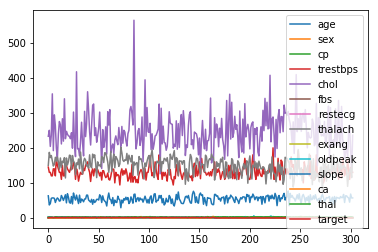

In [3]:
data.plot()
plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


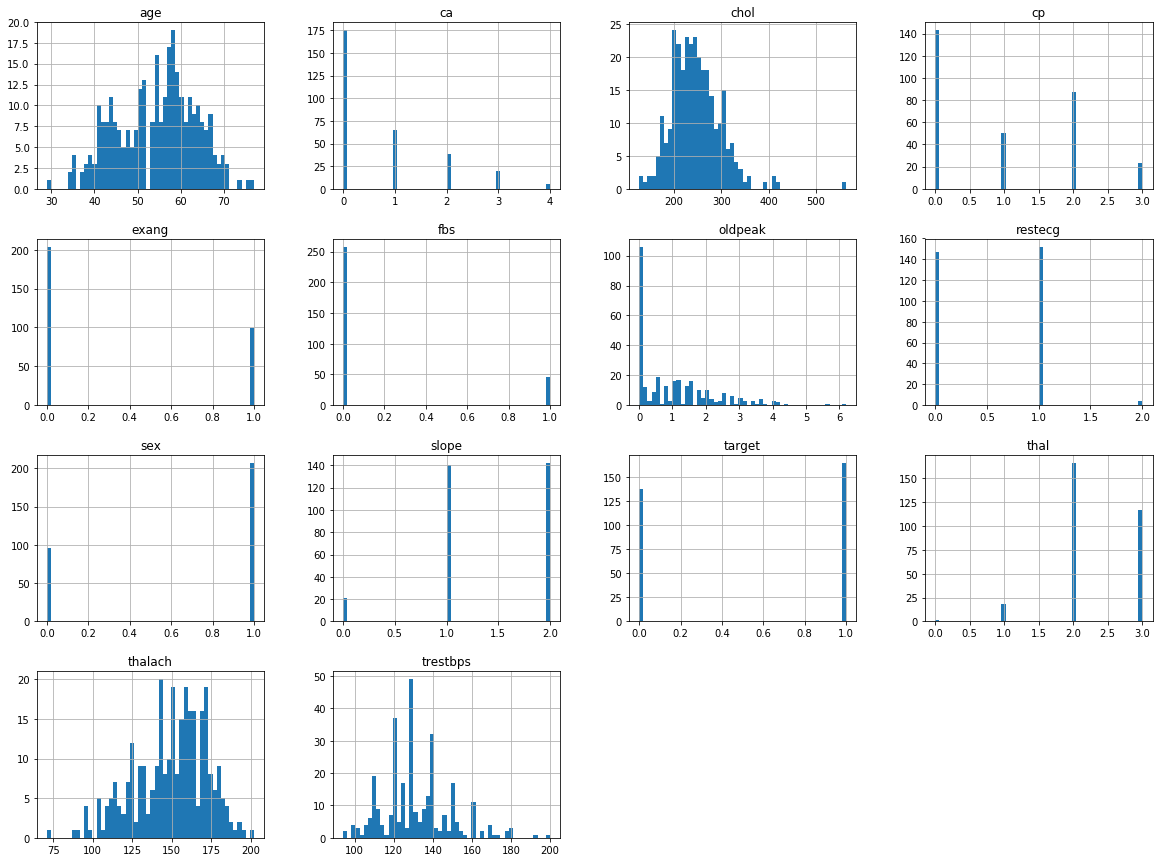

In [5]:


%matplotlib inline
import matplotlib.pyplot as plt

# show the histogram of instances.
data.hist(bins=50, figsize=(20, 15))
plt.show()



In [6]:
import numpy as np

# function for spliting the data
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

243 train + 60 test


In [8]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [9]:
data_with_id = data.reset_index()   # adds an 'index' column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


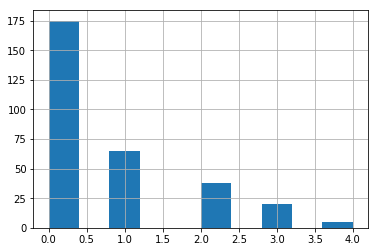

In [11]:
data["ca"].hist()

In [12]:
 # Divide by 1.5 to limit the number of income categories
data["ca2"] = np.ceil(data["ca"] / 1.5)
# Label those above 5 as 5
data["ca2"].where(data["ca2"] < 5, 5, inplace=True)



In [13]:
data["ca2"].value_counts()

0.0    175
1.0     65
2.0     58
3.0      5
Name: ca2, dtype: int64

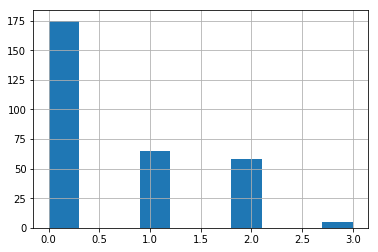

In [14]:
data["ca2"].hist()

In [15]:
##### now use this code to do a stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index, in split.split(data, data["ca2"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]



In [16]:
strat_test_set["ca2"].value_counts() / len(strat_test_set)



0.0    0.573770
1.0    0.213115
2.0    0.196721
3.0    0.016393
Name: ca2, dtype: float64

In [17]:
data["ca2"].value_counts() / len(data)

0.0    0.577558
1.0    0.214521
2.0    0.191419
3.0    0.016502
Name: ca2, dtype: float64

In [18]:
import pandas as pd

# compare the income category proportions in the overall dataset.

def income_cat_proportions(data):
    return data["ca2"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [19]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0.0,0.577558,0.573770,0.508197,-12.009368,-0.655738
1.0,0.214521,0.213115,0.196721,-8.297604,-0.655738
2.0,0.191419,0.196721,0.262295,37.026569,2.769927
3.0,0.016502,0.016393,0.032787,98.688525,-0.655738


In [20]:
# remove the income_cat attribute. The data is back to its original state.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("ca2", axis=1, inplace=True)

In [21]:
data = strat_train_set.copy()  # make a copy of the data.

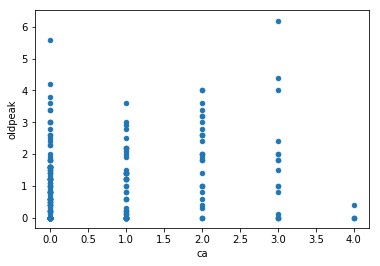

In [22]:
data.plot(kind="scatter", x="ca", y="oldpeak")
plt.show()

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix["ca"].sort_values(ascending=False)

ca          1.000000
age         0.301043
oldpeak     0.210644
trestbps    0.134319
thal        0.119664
fbs         0.088697
sex         0.088360
exang       0.072554
chol        0.042980
restecg    -0.031914
slope      -0.069520
cp         -0.162128
thalach    -0.187455
target     -0.374026
Name: ca, dtype: float64

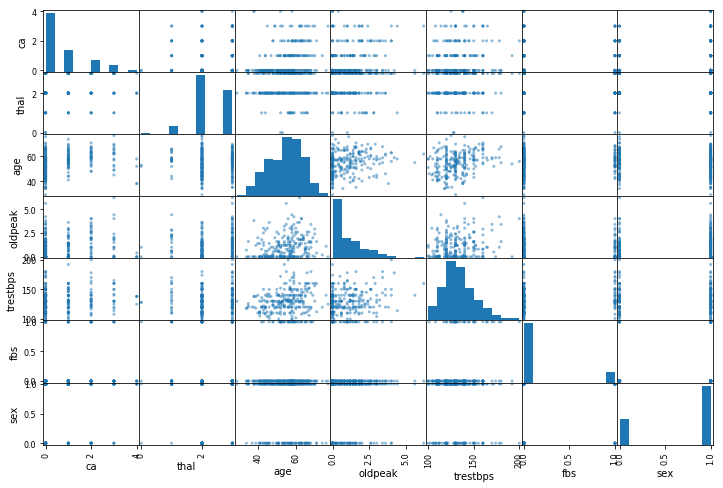

In [25]:
# check correlations between attributes using Pandas' *scatter_matrix*.
from pandas.plotting import scatter_matrix

attributes = ["ca", "thal", "age", "oldpeak","trestbps","fbs","sex"] #only promising attributes.
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()



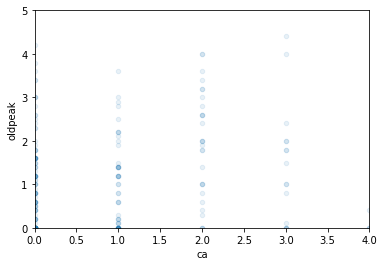

In [26]:
# The most promising attribute to predict the median house value is the median income.
data.plot(kind="scatter", x="ca", y="oldpeak", alpha=0.1)
plt.axis([0, 4, 0, 5])
plt.show()


In [27]:
data.describe()#no tomar en cuenta Serial No. se tendra que borrar despues porque no nos sirve, hay que buscar como borrarlo

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.582645,0.694215,0.971074,131.68595,244.913223,0.152893,0.520661,149.181818,0.330579,1.061570,1.404959,0.731405,2.305785,0.549587
std,8.926358,0.461694,1.016049,17.74767,53.567547,0.360630,0.524886,22.961993,0.471396,1.174615,0.618907,1.029727,0.635636,0.498566
min,29.000000,0.000000,0.000000,100.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,272.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Para la parte del limpiado de los datos, hay que mencionar que en este dataset, no hay valores nulos en ningun campo, pero lo que si hay, esque existe un campo que es llamado "Serial No." el cual no nos sirve puesto que solo es un tipo de index para mantener orden en los datos, por lo que se quitara del dataset.

In [28]:
#Preparamos los datos para empezar a trabajar
dt = pd.read_csv("heart.csv",sep = ",")
dt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [29]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
dt.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [31]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [32]:
y = dt["target"].values
x = dt.drop(["target"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print("Predictions:", lin_reg.predict(x_test))

Predictions: [ 0.20461609  0.62932079  0.71803669  0.04394647  0.93859572  0.82919673
  0.55248505 -0.31123783 -0.12686594  0.50190798  0.67329639  0.22858348
  0.83576074  0.10160178  1.1070706   0.90376346  1.08827421  0.21347573
 -0.14247183 -0.02892816  0.60715419 -0.05665451  0.35685167  0.68434807
  0.88713565  0.60700687  0.81935794  0.53123747 -0.10013016  0.8970951
  0.05884203  0.07332101 -0.14826886  0.24195448  0.69307817  0.19714348
  0.66820272  0.77828265  0.68233201  0.75469071  0.49240619  0.64012072
  0.75759582  0.67302635  0.74556992 -0.1916457   0.66356747  0.91773248
  0.22766617 -0.00575935  0.15521194 -0.13222102  0.78206754  1.04130301
  0.33798087 -0.2796243   0.11850097  0.94519132  0.01120021 -0.218084
  0.15742582]


In [35]:
print("Expected:", y_test, "\n", "Obtained", lin_reg.predict(x_test)) #Hacemos la comparacion de los resultados obtenidos del modelo

Expected: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0] 
 Obtained [ 0.20461609  0.62932079  0.71803669  0.04394647  0.93859572  0.82919673
  0.55248505 -0.31123783 -0.12686594  0.50190798  0.67329639  0.22858348
  0.83576074  0.10160178  1.1070706   0.90376346  1.08827421  0.21347573
 -0.14247183 -0.02892816  0.60715419 -0.05665451  0.35685167  0.68434807
  0.88713565  0.60700687  0.81935794  0.53123747 -0.10013016  0.8970951
  0.05884203  0.07332101 -0.14826886  0.24195448  0.69307817  0.19714348
  0.66820272  0.77828265  0.68233201  0.75469071  0.49240619  0.64012072
  0.75759582  0.67302635  0.74556992 -0.1916457   0.66356747  0.91773248
  0.22766617 -0.00575935  0.15521194 -0.13222102  0.78206754  1.04130301
  0.33798087 -0.2796243   0.11850097  0.94519132  0.01120021 -0.218084
  0.15742582]


In [36]:
from sklearn.metrics import mean_squared_error


data_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.34098492624865423

In [37]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
##x_train, y_train
data_predictions = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.4937627496000098

In [39]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [0.56568542 0.28284271 0.57735027 0.5        0.57735027 0.57735027
 0.61237244 0.40824829 0.54006172 0.64549722]
Mean: 0.5286758620387616
Standard deviation: 0.10247845089369897


In [41]:
lin_scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.46026721 0.34312395 0.38936559 0.34757213 0.3742127  0.40602427
 0.3585196  0.31665869 0.37226992 0.34936415]
Mean: 0.3717378206381528
Standard deviation: 0.03800250817127978


In [42]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
data_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.18044939310253827

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.56568542 0.4        0.57735027 0.5        0.54006172 0.57735027
 0.54006172 0.40824829 0.5        0.57735027]
Mean: 0.5186107972716621
Standard deviation: 0.06358333864504852


In [46]:
lin_scores = cross_val_score(lin_reg, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)



Scores: [0.46026721 0.34312395 0.38936559 0.34757213 0.3742127  0.40602427
 0.3585196  0.31665869 0.37226992 0.34936415]
Mean: 0.3717378206381528
Standard deviation: 0.03800250817127978


In [47]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
housing_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.18044939310253827

In [49]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.39242834 0.35608988 0.40620192 0.43349356 0.3082207  0.42229532
 0.39528471 0.32210247 0.38997863 0.31556827]
Mean: 0.3741663787576298
Standard deviation: 0.04325722684209615


In [50]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.371738
std       0.040058
min       0.316659
25%       0.348020
50%       0.365395
75%       0.385577
max       0.460267
dtype: float64

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
# The best hyperparameter combination
grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [53]:
# the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4422581672523159 {'max_features': 2, 'n_estimators': 3}
0.38767158291309817 {'max_features': 2, 'n_estimators': 10}
0.4014436757421748 {'max_features': 4, 'n_estimators': 3}
0.3771905715586317 {'max_features': 4, 'n_estimators': 10}
0.4160463702347267 {'max_features': 6, 'n_estimators': 3}
0.38783143650366436 {'max_features': 6, 'n_estimators': 10}
0.4386095401857615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3779566637452255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.44173877991252275 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.38719162616448827 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.43121968093205176 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.39317524955101657 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb2aca19550>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb2aca195c0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.36469787544353094 {'max_features': 7, 'n_estimators': 180}
0.37004454599936365 {'max_features': 5, 'n_estimators': 15}
0.36732660370911085 {'max_features': 3, 'n_estimators': 72}
0.3661912924517611 {'max_features': 5, 'n_estimators': 21}
0.3627408441245345 {'max_features': 7, 'n_estimators': 122}
0.3662221196965096 {'max_features': 3, 'n_estimators': 75}
0.3646072278573656 {'max_features': 3, 'n_estimators': 88}
0.36313032972148773 {'max_features': 5, 'n_estimators': 100}
0.36320024352447106 {'max_features': 3, 'n_estimators': 150}
0.4276110845960632 {'max_features': 5, 'n_estimators': 2}


In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0631291 , 0.02472066, 0.14122906, 0.07538524, 0.06205137,
       0.00260689, 0.01862761, 0.15689938, 0.10509277, 0.13815238,
       0.03112465, 0.11212821, 0.0688527 ])

In [58]:
final_model = grid_search.best_estimator_
##x_train, x_test,y_train, y_test

X_test_prepared = x_test
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.34044329828073033

# Parte para linear regression vista en clase

In [59]:
#Esta es la implementacion en clase
from sklearn import datasets
from sklearn.model_selection import train_test_split
##oldpeak , ca
dt= pd.read_csv('heart.csv')

X = dt[['ca','oldpeak']].values
y = dt['target'].values
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [60]:
print(X)

[[0.  2.3]
 [0.  3.5]
 [0.  1.4]
 [0.  0.8]
 [0.  0.6]
 [0.  0.4]
 [0.  1.3]
 [0.  0. ]
 [0.  0.5]
 [0.  1.6]
 [0.  1.2]
 [0.  0.2]
 [0.  0.6]
 [0.  1.8]
 [0.  1. ]
 [0.  1.6]
 [0.  0. ]
 [0.  2.6]
 [0.  1.5]
 [2.  1.8]
 [0.  0.5]
 [0.  0.4]
 [0.  0. ]
 [0.  1. ]
 [0.  1.4]
 [2.  0.4]
 [0.  1.6]
 [0.  0.6]
 [1.  0.8]
 [0.  1.2]
 [1.  0. ]
 [0.  0.4]
 [0.  0. ]
 [1.  0.5]
 [1.  1.4]
 [0.  1.4]
 [0.  0. ]
 [0.  1.6]
 [0.  0.8]
 [0.  0.8]
 [1.  1.5]
 [0.  0.2]
 [0.  3. ]
 [0.  0.4]
 [0.  0. ]
 [0.  0.2]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]
 [0.  0.4]
 [3.  1.8]
 [0.  0.6]
 [0.  0. ]
 [1.  0.8]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  1.4]
 [0.  1.2]
 [0.  0.6]
 [0.  0. ]
 [0.  0. ]
 [0.  0.4]
 [1.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.2]
 [0.  1.4]
 [0.  2.4]
 [0.  0. ]
 [0.  0. ]
 [0.  0.6]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [0.  1.2]
 [0.  0.6]
 [0.  1.6]
 [1.  1. ]
 [0.  0. ]
 [0.  1.6]
 [0.  1. ]
 [2.  0. ]

In [61]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


Implementacion expuesta en clase

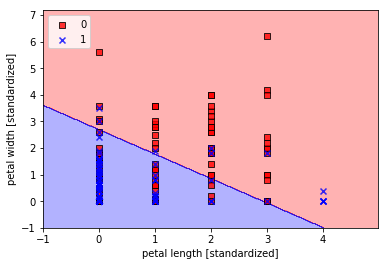

In [62]:
from plot_regions import plot_decision_regions
from logistic_regression_gd import LogisticRegressionGD

lrgd = LogisticRegressionGD(eta=0.05, n_iter=2000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(x=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Linear Regression Manual

Ahora nos toca a nosotros crear el modelo de la regresión logistica para poder realizar la clasificación binaria

In [63]:
dt= pd.read_csv('heart.csv')
#Obtenemos los datos para el programa
X = dt[['ca','oldpeak']].values
y = dt['target'].values
print(X)
print(y)

[[0.  2.3]
 [0.  3.5]
 [0.  1.4]
 [0.  0.8]
 [0.  0.6]
 [0.  0.4]
 [0.  1.3]
 [0.  0. ]
 [0.  0.5]
 [0.  1.6]
 [0.  1.2]
 [0.  0.2]
 [0.  0.6]
 [0.  1.8]
 [0.  1. ]
 [0.  1.6]
 [0.  0. ]
 [0.  2.6]
 [0.  1.5]
 [2.  1.8]
 [0.  0.5]
 [0.  0.4]
 [0.  0. ]
 [0.  1. ]
 [0.  1.4]
 [2.  0.4]
 [0.  1.6]
 [0.  0.6]
 [1.  0.8]
 [0.  1.2]
 [1.  0. ]
 [0.  0.4]
 [0.  0. ]
 [1.  0.5]
 [1.  1.4]
 [0.  1.4]
 [0.  0. ]
 [0.  1.6]
 [0.  0.8]
 [0.  0.8]
 [1.  1.5]
 [0.  0.2]
 [0.  3. ]
 [0.  0.4]
 [0.  0. ]
 [0.  0.2]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]
 [0.  0.4]
 [3.  1.8]
 [0.  0.6]
 [0.  0. ]
 [1.  0.8]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  1.4]
 [0.  1.2]
 [0.  0.6]
 [0.  0. ]
 [0.  0. ]
 [0.  0.4]
 [1.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.2]
 [0.  1.4]
 [0.  2.4]
 [0.  0. ]
 [0.  0. ]
 [0.  0.6]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]
 [0.  1.2]
 [0.  0.6]
 [0.  1.6]
 [1.  1. ]
 [0.  0. ]
 [0.  1.6]
 [0.  1. ]
 [2.  0. ]

Lo visto en clase indica que tenemos que hacer que el modelo defina si un nuevo dato pertenece a la clase 1 o a la clase 0, para este problema si es propenso a tener problemas del corazon.
Para esto es necesario definir una sigmoide debido a que se buscan valores superiores a 0 pero que sean menores que 1. Se tienen que definir 

S(z)=$\frac{1}{1-e^{x}}$  donde Z=$w^T$*x+b

Esto si lo traducimos a codigo en una sencilla implementacion obtenemos:

In [64]:
class LogisticRegressionManual:
    
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.verbose=verbose
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoide(self, z):#Funcion de l sigmoide
        return 1 / (1 + np.exp(-z))

    def __funciondeerror(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # inicializacion de los pesos, se inician en 0 pero se puede con otros valores (se recomienda de -3 a 3)
        self.theta = np.zeros(X.shape[1])
        #Se define el numero de iteraciones que se hara la busqueda, en este caso dejamos a un lado las epocas
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoide(z)
            #Aqui se realiza la funcion del gradiente descendiente, con el fin de minimizar la funcion de error
            #obteniendo el resultado de la derivada parcial de (1/m)*X^(g(XdeTheta)-y), en donde segun esta derivada
            #se hace mas grande o pequenos los pesos (thetha)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoide(z)
                print(f'Funcion de error: {self.__funciondeerror(h, y)} \t')
    
    def predict_probabilidad(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoide(np.dot(X, self.theta))
    
    def predict(self, X, umbral):
        print(f'W:{self.theta}')
        return self.predict_probabilidad(X) >= umbral#Si el valor supera el umbral de devuelve true que es 1, en caso contrario se devuelve 0 que es false

In [65]:
learningrate=0.3
lrm = LogisticRegressionManual(learningrate, num_iter=400000)
lrm.fit(X, y)

In [66]:
umbral=0.5 ##aqui se define el umbral, en la clase se vio que se definio 0.5
#pero dependiendo del problema puede variar este valor segun tengo entendido
perdicciones = lrm.predict(X,umbral)

print("Porcentaje de precisión")
(perdicciones == y).mean()

W:[ 1.647679   -0.81880078 -0.90063489]
Porcentaje de precisión


0.7458745874587459

In [67]:
#Ahora procedemos a usar los datos de prueba 
dt2= pd.read_csv('heart.csv')
#Obtenemos los datos para el programa
X2 = dt2[['ca','oldpeak']].values
y2 = dt2['target'].values
X2 =  X2[:100]# tomamos los ultimos 100 datos del dataset
y2 =  y2[:100]# tomamos los ultimos 100 datos del dataset
perdicciones = lrm.predict(X2,umbral)
print("Resultados esperados")
print(perdicciones)#True = 1, False = 0
print(y2)
print('Precisión')
(perdicciones == y2).mean()

W:[ 1.647679   -0.81880078 -0.90063489]
Resultados esperados
[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True False False False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Precisión


0.85

## Conclusiones

En mis conclusiones, el dataset que uso para los experimentos esta muy incompleto, por lo que me he dado cuenta que se requieren de muchisimos mas datos ademas de tener atributos aun mas significativos, aunque se que es dificil que encuentre eso, debido a que no hay estandares que dicten una correcta forma